<a href="https://colab.research.google.com/github/Kanhaiyayadav67/ComputerVision/blob/main/Assignment_2_KNN_Decision_Boundaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

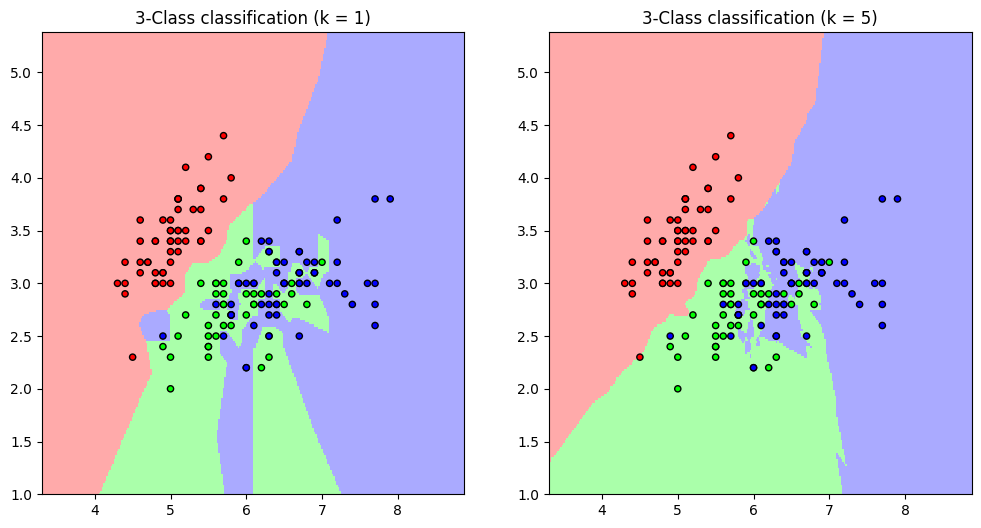

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

# import some data to play with
iris = datasets.load_iris()
# the first two features.
data = iris.data[:, :2]
target = iris.target

# Create color maps for visualization
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundaries
plt.figure(figsize=(12, 6))

for i, k in enumerate([1, 5]):
    # Initialize k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier
    knn.fit(data, target)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    h = .02  # step size in the mesh
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 2, i + 1)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(data[:, 0], data[:, 1], c=target, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % k)

plt.show()


In [7]:
import numpy as np

class DecisionTree:
    def __init__(self, x, y, id3=True):
        self.x = x
        self.y = y
        self.id3 = id3
        self.root = None

    def entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def information_gain(self, x, y, x_val):
        y_left = y[x == x_val]
        y_right = y[x != x_val]
        p_left = len(y_left) / len(y)
        p_right = len(y_right) / len(y)
        e_left = self.entropy(y_left)
        e_right = self.entropy(y_right)
        e_parent = p_left * e_left + p_right * e_right
        ig = self.entropy(y) - e_parent
        return ig

    def split(self, x, y):
        best_ig = 0
        best_idx = None
        best_thresh = None
        for i in range(x.shape[1]):
            thresholds = np.unique(x[:, i])
            for thresh in thresholds:
                ig = self.information_gain(x[:, i], y, thresh)
                if ig > best_ig:
                    best_ig = ig
                    best_idx = i
                    best_thresh = thresh
        if best_ig == 0:
            return None, None
        left_idxs = x[:, best_idx] <= best_thresh
        right_idxs = x[:, best_idx] > best_thresh
        return left_idxs, right_idxs

    def build_tree(self, x, y, depth=0):
        if len(np.unique(y)) == 1:
            return np.unique(y)[0]
        if depth >= 10 or len(y) <= 1:
            return np.argmax(np.bincount(y))
        left_idxs, right_idxs = self.split(x, y)
        if left_idxs is None:
            return np.argmax(np.bincount(y))
        left = self.build_tree(x[left_idxs], y[left_idxs], depth + 1)
        right = self.build_tree(x[right_idxs], y[right_idxs], depth + 1)
        return {'feature': np.argmax(np.bincount(x[:, best_idx])), 'thresh': best_thresh, 'left': left, 'right': right}

    def fit(self):
        self.root = self.build_tree(self.x, self.y)

    def predict(self, x):
        node = self.root
        while type(node) is dict:
            if x[node['feature']] <= node['thresh']:
                node = node['left']
            else:
                node = node['right']
        return node
